In [108]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import analysis_utils as au
import importlib
import scipy.signal as scisig

In [109]:
path = 'D:/Lab Data/lorentz_force/sphere_20250219/20250224_1e-7mbar/'
filestart = '20250125_abcd_nomagnet_1'
file_num = [0, 1, 2, 3, 4]
file_end = '.hdf5'

In [ ]:
datas = []
PSDs = []
for i in file_num:
    filename = path + filestart + str(i) + file_end
    mdict = au.load_data_hdf5(filename)
    metadict = au.load_metadata_hdf5(filename)
    data_volts = np.array(mdict['data']['channel_d'])*metadict['channel_d']['adc2mv']/1000
    datas.append(np.array(data_volts))
    for i in range(6):
        PSD_dv = scisig.welch(data_volts[int(i*5e6):int((i+1)*5e6)], fs=1/metadict['data']['delta_t'], nperseg=5*10**5)
        PSDs.append(PSD_dv[1])
freq = PSD_dv[0]

0
0
1
2
3
4
5
1
0
1
2
3


KeyboardInterrupt: 

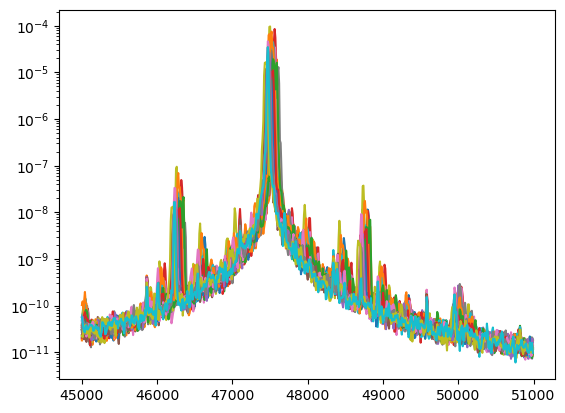

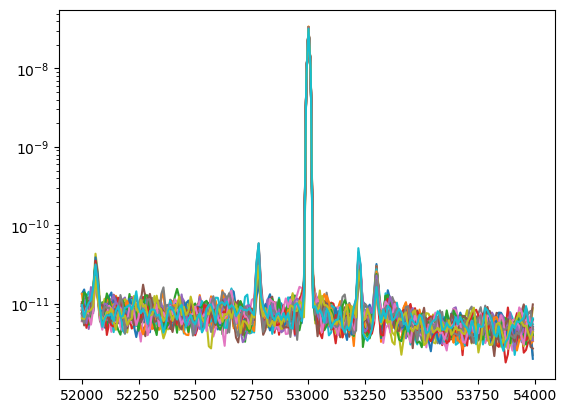

In [90]:
lb = 4500
ub = 5100
for PSD in PSDs:
    plt.plot(freq[lb:ub], PSD[lb:ub])
plt.yscale('log')
plt.figure()
lb = 5200
ub = 5400
for PSD in PSDs:
    plt.plot(freq[lb:ub], PSD[lb:ub])
plt.yscale('log')


In [94]:
path = 'D:/Lab Data/lorentz_force/sphere_20250219/20250224_1e-7mbar/'
filestart = '20250125_abcd_wmagnet_2'
file_num = [0, 1, 2, 3, 4]
file_end = '.hdf5'

In [95]:
datas2 = []
PSDs2 = []
for i in file_num:
    filename = path + filestart + str(i) + file_end
    mdict = au.load_data_hdf5(filename)
    metadict = au.load_metadata_hdf5(filename)
    data_volts = np.array(mdict['data']['channel_d'])*metadict['channel_d']['adc2mv']/1000
    datas2.append(np.array(data_volts))
    for i in range(6):
        PSD_dv = scisig.welch(data_volts[int(i*5e6):int((i+1)*5e6)], fs=1/metadict['data']['delta_t'], nperseg=5*10**5)
        PSDs2.append(PSD_dv[1])
freq2 = PSD_dv[0]

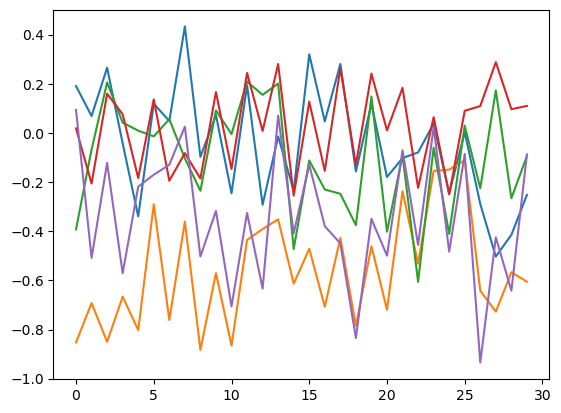

In [96]:
for data in datas2:
    plt.plot(data[::1000000])

In [97]:
len(PSDs2)

30

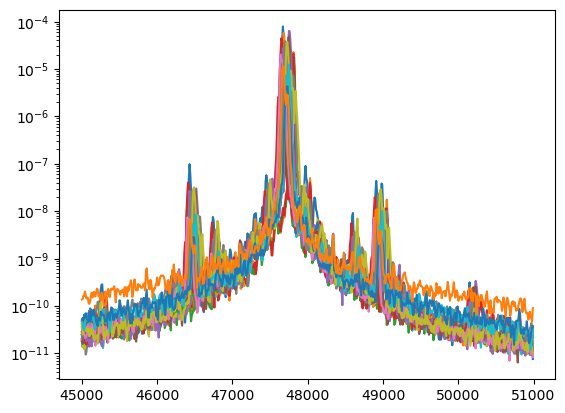

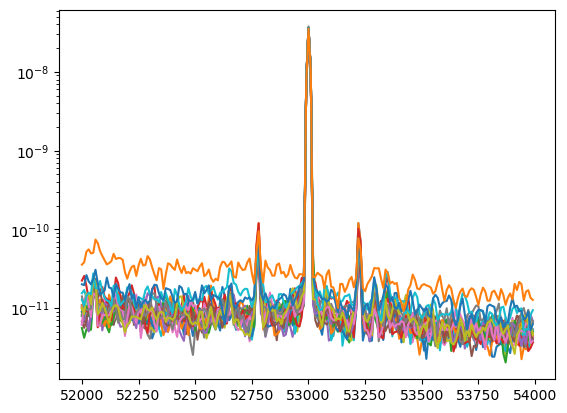

In [98]:
lb = 4500
ub = 5100
for PSD in PSDs2[8:]:
    plt.plot(freq2[lb:ub], PSD[lb:ub])
plt.yscale('log')
plt.figure()
lb = 5200
ub = 5400
for PSD in PSDs2[8:]:
    plt.plot(freq2[lb:ub], PSD[lb:ub])
plt.yscale('log')


In [99]:
PSD1_avr = np.mean(PSDs, axis=0)
PSD2_avr = np.mean(PSDs2[8:], axis=0)

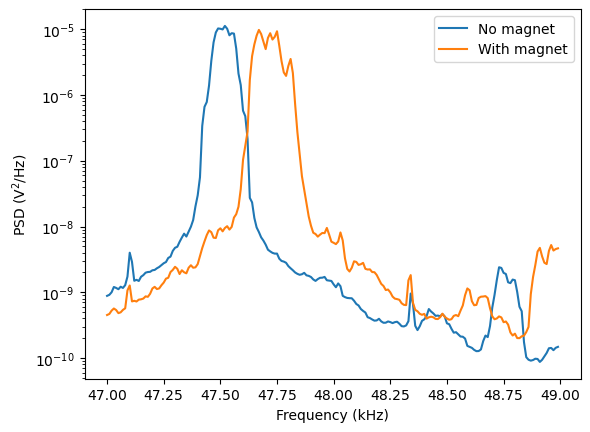

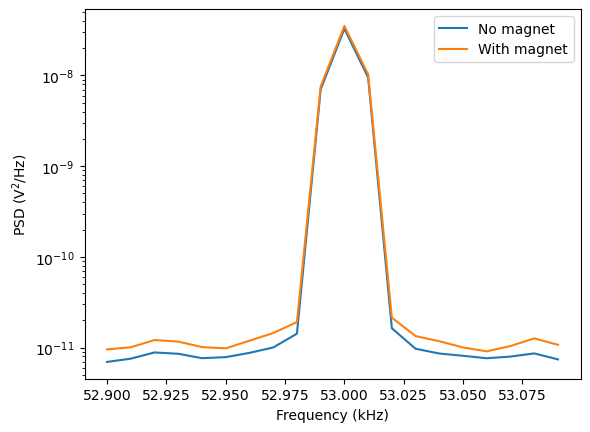

In [100]:
lb = 4700
ub = 4900
plt.plot(freq[lb:ub]/1000, PSD1_avr[lb:ub], label = 'No magnet')
plt.plot(freq[lb:ub]/1000, PSD2_avr[lb:ub], label = 'With magnet')
plt.yscale('log')
plt.ylabel('PSD (V$^2$/Hz)')
plt.xlabel('Frequency (kHz)')
plt.legend()
plt.figure()
lb = 5290
ub = 5310
plt.plot(freq[lb:ub]/1000, PSD1_avr[lb:ub], label = 'No magnet')
plt.plot(freq[lb:ub]/1000, PSD2_avr[lb:ub], label = 'With magnet')
plt.yscale('log')
plt.ylabel('PSD (V$^2$/Hz)')
plt.xlabel('Frequency (kHz)')
plt.legend()

In [101]:
PSD1_avr[5300]

3.268967296291264e-08

In [102]:
print((47.6**2-53**2)**2*PSD2_avr[5300])
print((47.5**2-53**2)**2*PSD1_avr[5300])

0.010384223738807416
0.009987759547645665


In [103]:
max_val = []
random_point = []
for PSD in PSDs:
    max_val.append(PSD[5300])
    random_point.append(PSD[5290])

max_val2 = []
random_point2 = []
for PSD in PSDs2:
    max_val2.append(PSD[5300])
    random_point2.append(PSD[5290])

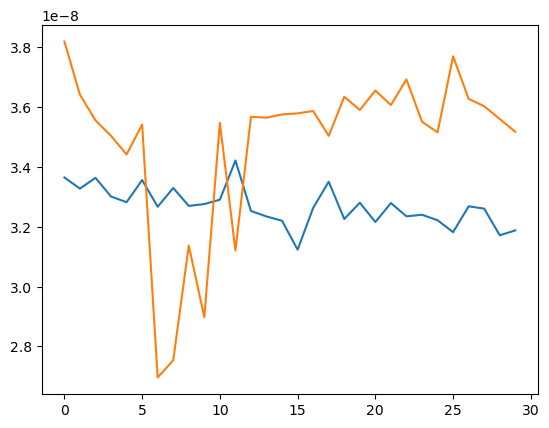

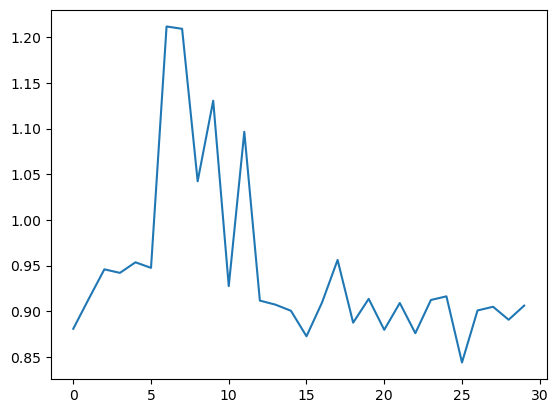

In [107]:
plt.plot(max_val)
plt.plot(max_val2[:])
plt.figure()
plt.plot(np.array(max_val)/np.array(max_val2))

In [105]:
np.std(max_val)

6.390749648022569e-10

In [106]:
np.std(max_val)/np.mean(max_val)

0.019549750942057624